In [2]:
import glob
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import PolyGate

from scipy.stats import gaussian_kde

colors = sns.color_palette("Set2")
color_undiff = colors[-2] # undiff
color_pma = colors[1] #PMA
color_dmso = colors[2] #DMSO
# sns.color_palette("Set2")

In [62]:
files = glob.glob('../../data/flow_cytometry/20230508_CD52/Sample Group - 1/*iso*')
files

['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_SC575_sgControl1_isotype_IGNORE_Data Source - 1.fcs']

In [167]:
sample = FCMeasurement(ID='DMSO_iso', datafile=files[0])

tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)


/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)


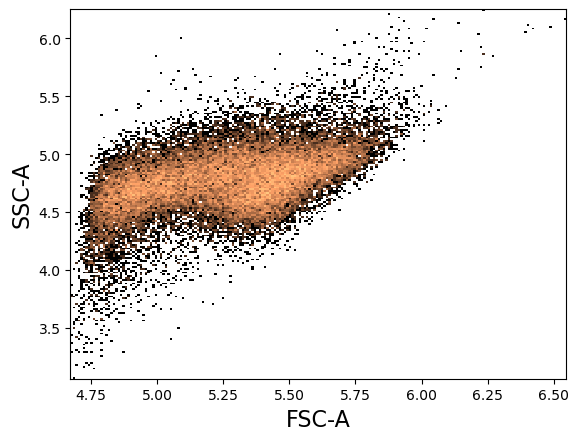

In [168]:
_ = tsample.plot(['FSC-A', 'SSC-A'])
# plt.xlim(7500,10000)
# plt.ylim(6000,9500)

(3.25, 6.2)

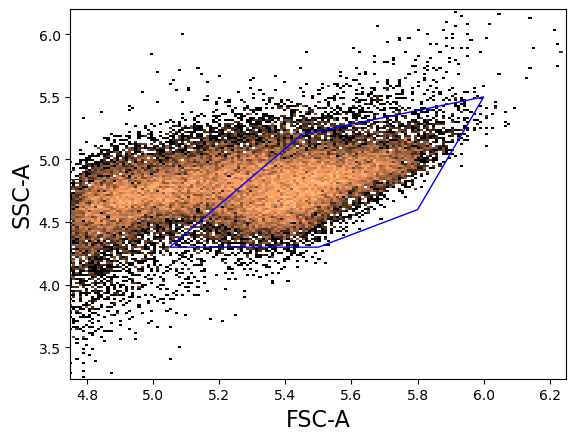

In [169]:
# gate = PolyGate([(8300,7000),(8500,7400), (9200,8300), (9600,8100), (8800,6700)], channels = ['FSC-A', 'SSC-A'],name = 'gate')
gate_diff = PolyGate([(5.05,4.3),(5.45,5.2), (6,5.5), (5.8,4.6), (5.5,4.3)], 
                channels = ['FSC-A', 'SSC-A'],name = 'gate')

_ = tsample.plot(['FSC-A', 'SSC-A'], gates = [gate])
plt.xlim(4.75,6.25)
plt.ylim(3.25,6.2)

(3.25, 6.2)

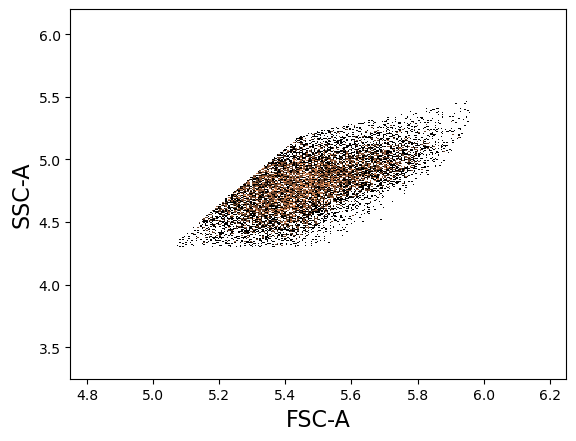

In [170]:
gated_sample = tsample.gate(gate)
_ = gated_sample.plot(['FSC-A', 'SSC-A'])
plt.xlim(4.75,6.25)
plt.ylim(3.25,6.2)

In [188]:
sample = FCMeasurement(ID='DMSO_iso', datafile=files[1])

tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

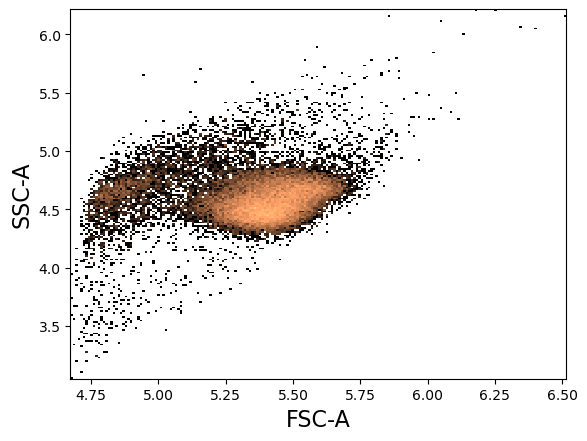

In [189]:
_ = tsample.plot(['FSC-A', 'SSC-A'])

(3.25, 6.2)

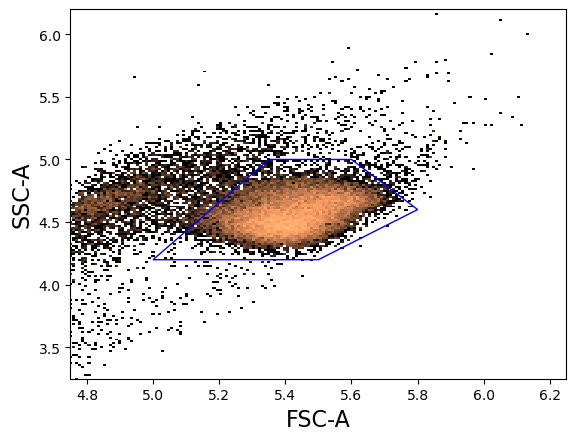

In [206]:
gate_undiff = PolyGate([(5.0,4.2),(5.35,5.), (5.6,5.0), (5.8,4.6), (5.5,4.2)], 
                channels = ['FSC-A', 'SSC-A'],name = 'gate')

_ = tsample.plot(['FSC-A', 'SSC-A'], gates = [gate_undiff])
plt.xlim(4.75,6.25)
plt.ylim(3.25,6.2)

In [177]:
gated_sample_ = gated_sample.data
gated_sample_ = gated_sample_.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0]

In [178]:
gated_sample_

,TIME,FSC-A,FSC-H,FSC-W,SSC-A,FITC-A,APC-A,PerCP-Cy5.5-A
0,0.000000,5.620791,185189.765625,316.0,5.037920,2103.751465,0.503131,-18.860254
4,0.197771,5.419738,158578.562500,254.0,4.628801,2027.071777,2.078393,46.774612
5,0.217051,5.382879,97704.320312,309.0,4.853362,2312.703613,2.632107,615.973816
11,0.361509,5.380925,128788.796875,259.0,4.496525,821.416443,2.209556,23.859180
12,0.377097,5.518907,187062.406250,278.0,4.738322,3979.336670,2.297044,165.996780
...,...,...,...,...,...,...,...,...
32895,400.835785,5.378473,118354.882812,277.0,4.640301,981.809692,2.295068,463.454987
32897,400.862549,5.348821,94868.476562,281.0,4.804614,1933.419434,1.698749,67.374901
32898,400.871765,5.503256,128434.882812,329.0,4.775882,1859.334961,1.961699,15.704590
32901,400.910889,5.471570,183527.687500,254.0,4.485218,2325.105225,1.390352,-52.732033


(0.0, 6.0)

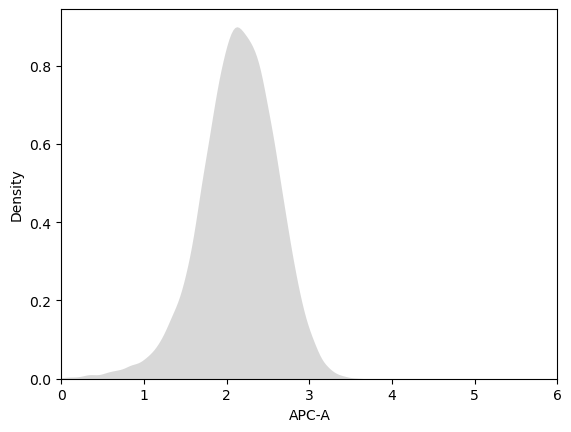

In [180]:
sns.kdeplot(gated_sample_["APC-A"], color = 'grey',
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

In [58]:
files = glob.glob('../../data/flow_cytometry/20230508_CD52/Sample Group - 1/*')
files

['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgLAMTOR1_CD52_rep1 - 1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgFLCN_CD52_rep2_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgFLCN1_CD52_rep2_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_CD52_rep2_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC5

In [181]:
f = '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs'
sample = FCMeasurement(ID='DMSO_iso', datafile=f)
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 0.1, r=1, d=1)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)


In [185]:
# gated_sample = tsample.gate(gate)
# gated_sample_ = gated_sample.data
gated_sample_ = tsample.data
gated_sample_ = gated_sample_.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0]

(0.0, 6.0)

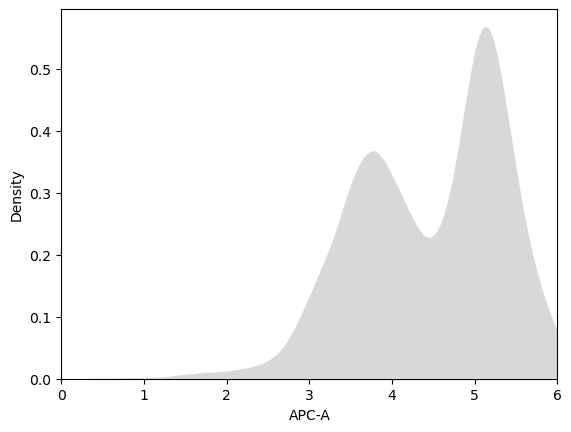

In [186]:
sns.kdeplot(gated_sample_["APC-A"], color = 'grey',
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

In [ ]:


[
 


 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgFLCN1_CD52_rep2_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_CD52_rep2_Data Source - 1.fcs',



 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_CD52_rep2_Data Source - 1.fcs',

 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgLAMTOR1_CD52_rep2 _Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgLAMTOR1_CD52_rep2_Data Source - 1.fcs',

 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs']

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  ret

(0.0, 6.0)

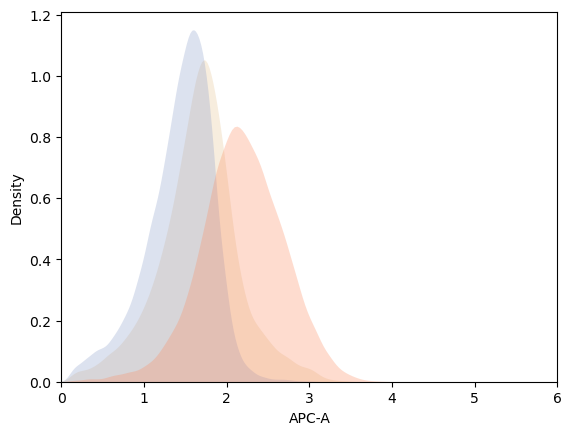

In [229]:
files_iso = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_isotype_Data Source - 1.fcs']


sample = FCMeasurement(ID='iso', datafile=files_iso[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_undiff,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_iso[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_dmso,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_iso[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_pma,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  ret

(0.0, 6.0)

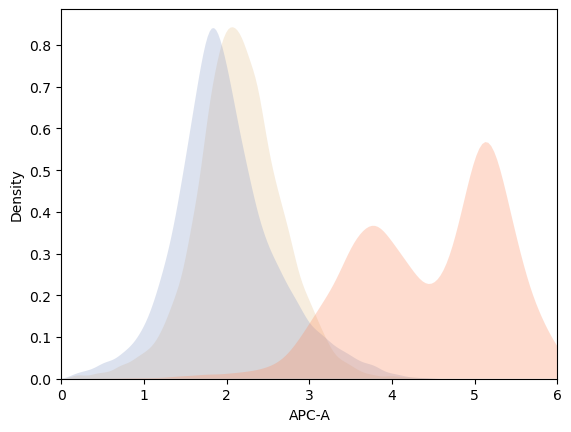

In [233]:
files_ctrl = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_ctrl[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_undiff,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_ctrl[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_dmso,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_ctrl[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_pma,
            lw = 0, alpha = 0.3, legend = False, shade = True)
plt.xlim(0,6)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  ret

(0.0, 6.0)

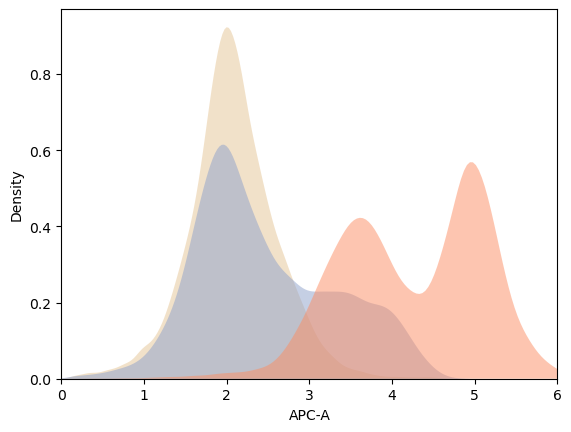

In [238]:
files_flcn = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_flcn[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_undiff,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_flcn[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_dmso,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_flcn[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_pma,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  ret

(0.0, 6.0)

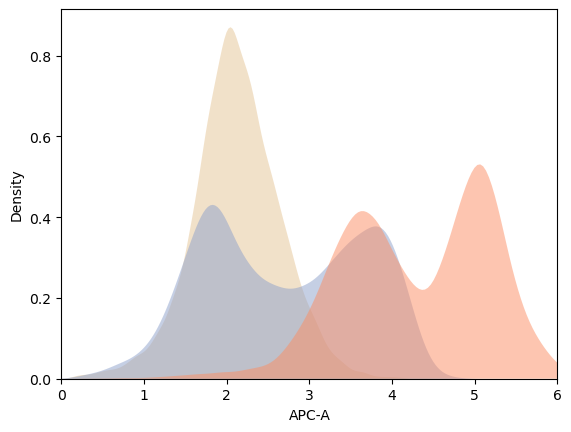

In [239]:
files_flcn = [ '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgLAMTOR1_CD52_rep1 _Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgLAMTOR1_CD52_rep1 - 1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgLAMTOR1_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_flcn[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_undiff,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_flcn[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_dmso,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_flcn[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], color = color_pma,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/containers.py:253: UserWarning: Encountered both auto_range=True and user-specified range value in parameter d.
 Range value specified in parameter d is used.
  'Encountered both auto_range=True and user-specified range value in '
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  ret

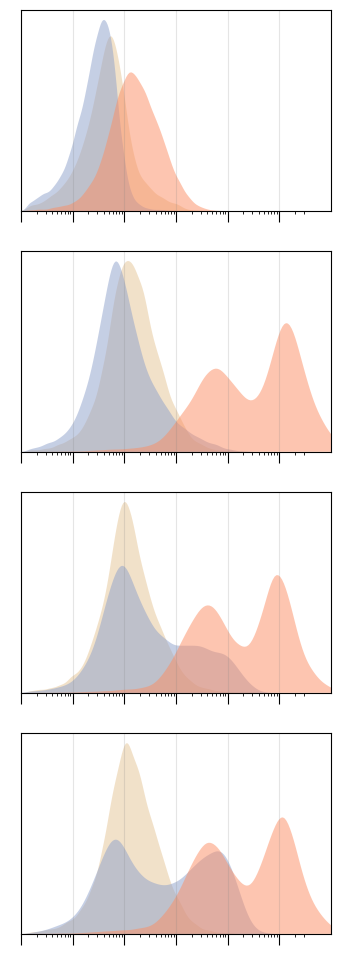

In [261]:
fig, ax = plt.subplots(4,1, figsize = (4,12))


#######################
# Isotype controls
#######################

files_iso = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_isotype_Data Source - 1.fcs']


sample = FCMeasurement(ID='iso', datafile=files_iso[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[0], color = color_undiff,
            lw = 0, alpha = 0.5, legend = False, shade = True)



sample = FCMeasurement(ID='iso', datafile=files_iso[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[0], color = color_dmso,
            lw = 0, alpha = 0.5, legend = False, shade = True)


sample = FCMeasurement(ID='iso', datafile=files_iso[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[0], color = color_pma,
            lw = 0, alpha = 0.5, legend = False, shade = True)


#######################
# sgControl 
#######################

files_ctrl = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_ctrl[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[1], color = color_undiff,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_ctrl[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[1], color = color_dmso,
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_ctrl[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[1], color = color_pma,
            lw = 0, alpha = 0.5, legend = False, shade = True)

#######################
# FLCN knockdown 
#######################
files_flcn = ['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgFLCN_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_flcn[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[2], color = color_undiff,
            lw = 0, alpha = 0.5, legend = False, shade = True)


sample = FCMeasurement(ID='iso', datafile=files_flcn[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[2], color = color_dmso,
            lw = 0, alpha = 0.5, legend = False, shade = True)

sample = FCMeasurement(ID='iso', datafile=files_flcn[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[2], color = color_pma,
            lw = 0, alpha = 0.5, legend = False, shade = True)

#######################
# LAMTOR1 knockdown
#######################

files_lamtor1 = [ '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgLAMTOR1_CD52_rep1 _Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgLAMTOR1_CD52_rep1 - 1_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgLAMTOR1_CD52_rep1_Data Source - 1.fcs']

sample = FCMeasurement(ID='ctrl', datafile=files_lamtor1[0])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_undiff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[3], color = color_undiff, label = 'undifferentiated',
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)


sample = FCMeasurement(ID='iso', datafile=files_lamtor1[1])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

gated_sample = tsample.gate(gate_diff)
gated_sample_ = gated_sample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[3], color = color_dmso, label = '5day+DMSO (neutrophil)',
            lw = 0, alpha = 0.5, legend = False, shade = True)
plt.xlim(0,6)

sample = FCMeasurement(ID='iso', datafile=files_lamtor1[2])
tsample = sample.transform('tlog',channels=['FSC-A', 'SSC-A'], th = 0.1, r=1, d=1)
tsample = tsample.transform('tlog',channels='APC-A', th = 1, r=1, d=1)

# gated_sample = tsample.gate(gate_diff)
gated_sample_ = tsample.data.dropna()
gated_sample_ = gated_sample_[gated_sample_["APC-A"]>=0.1]

sns.kdeplot(gated_sample_["APC-A"], ax = ax[3], color = color_pma, label = '5day+PMA (macrophage)',
            lw = 0, alpha = 0.5, legend = True, shade = True)

# ax[3].legend()

#######################
# fix axis ticks
#######################
for ax_ in ax:
    ax_.set_yticks([])
    # ax_.set_xticks([0,2E3,4E3, 6E3, 8E3,10000])
    ax_.set_xlim(0,6)
    ax_.grid(axis='x', color= 'grey', alpha  = 0.2)#xcolor='0.95')

    # ax_.axes.get_xaxis().set_visible(False)
    ax_.axes.get_yaxis().set_visible(False)
    ax_.set_xlabel(None)
    ax_.set_xticks(np.log10([2, 3, 4, 5, 6, 7, 8, 9, 
                             20, 30, 40, 50, 60, 70, 80, 90, 
                             200,300,400,500,600,700,800,900,
                            2000,3000,4000,5000,6000,7000,8000,9000,
                            20000,30000,40000,50000,60000,70000,80000,90000,
                            200000,300000]), minor = True)
    ax_.set_xticks(np.log10([1, 10, 100,1000, 10000,100000]))
    ax_.set_xticklabels([])
    ax_.tick_params(length=8)